1. Low-level, basic and advanced opeartion, graph-based computation, gradient computation and optimization

2. data loading and transformation, predefined and custom loss functions, linear models and batch training

3. Dense neural networks layers, activation functions, opitmization algorithms, training neural networks

4. Neural networks in Keras, training and validation, estimators API

# Course Description
Not long ago, cutting-edge computer vision algorithms couldn’t differentiate between images of cats and dogs. Today, a skilled data scientist equipped with nothing more than a laptop can classify tens of thousands of objects with greater accuracy than the human eye. In this course, you will use TensorFlow 2.6 to develop, train, and make predictions with the models that have powered major advances in recommendation systems, image classification, and FinTech. You will learn both high-level APIs, which will enable you to design and train deep learning models in 15 lines of code, and low-level APIs, which will allow you to move beyond off-the-shelf routines. You will also learn to accurately predict housing prices, credit card borrower defaults, and images of sign language gestures.

# Defining data as constants
Throughout this course, we will use tensorflow version 2.6.0 and will exclusively import the submodules needed to complete each exercise. This will usually be done for you, but you will do it in this exercise by importing constant from tensorflow.

After you have imported constant, you will use it to transform a numpy array, credit_numpy, into a tensorflow constant, credit_constant. This array contains feature columns from a dataset on credit card holders and is previewed in the image below. We will return to this dataset in later chapters.

Note that tensorflow 2 allows you to use data as either a numpy array or a tensorflow constant object. Using a constant will ensure that any operations performed with that object are done in tensorflow.

In [ ]:
import pandas as pd 
import numpy as np
df= pd.read_csv('uci_credit_card.csv')
df1= df[['EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1']]
credit_numpy= df1.to_numpy()
credit_numpy

array([[ 2.0000e+00,  1.0000e+00,  2.4000e+01,  3.9130e+03],
       [ 2.0000e+00,  2.0000e+00,  2.6000e+01,  2.6820e+03],
       [ 2.0000e+00,  2.0000e+00,  3.4000e+01,  2.9239e+04],
       ...,
       [ 2.0000e+00,  2.0000e+00,  3.7000e+01,  3.5650e+03],
       [ 3.0000e+00,  1.0000e+00,  4.1000e+01, -1.6450e+03],
       [ 2.0000e+00,  1.0000e+00,  4.6000e+01,  4.7929e+04]])

In [ ]:
# Import constant from TensorFlow
from tensorflow import constant

# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)

# Print constant datatype
print('\n The datatype is:', credit_constant.dtype)

# Print constant shape
print('\n The shape is:', credit_constant.shape)


 The datatype is: <dtype: 'float64'>

 The shape is: (30000, 4)


# Defining variables
Unlike a constant, a variable's value can be modified. This will be useful when we want to train a model by updating its parameters.

Let's try defining and printing a variable. We'll then convert the variable to a numpy array, print again, and check for differences. Note that Variable(), which is used to create a variable tensor, has been imported from tensorflow and is available to use in the exercise.

In [ ]:
# import variable from Tensorflow
from tensorflow import Variable

# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print('\n A1: ', A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print('\n B1: ', B1)


 A1:  <tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

 B1:  [1 2 3 4]


# Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors. An example of an element-wise multiplication, denoted by the  symbol, is shown below:

  
  
 

In this exercise, you will perform element-wise multiplication, paying careful attention to the shape of the tensors you multiply. Note that multiply(), constant(), and ones_like() have been imported for you.

In [ ]:
from tensorflow import multiply, ones_like
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1, B1)
C23 = multiply(A23, B23)

# Print the tensors C1 and C23
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy()))


 C1: [1 2 3 4]

 C23: [[1 2 3]
 [1 6 4]]


# Making predictions with matrix multiplication
In later chapters, you will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset we will use later in the course.

The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, params. You will then use matmul() to perform matrix multiplication of features by params to generate predictions, billpred, which you will compare with bill. Note that we have imported matmul() and constant().

In [ ]:
from tensorflow import matmul
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features, params)
print('billpred:', billpred)
# Compute and print the error
error = bill- billpred
print('error:', error.numpy())

billpred: tf.Tensor(
[[ 5600]
 [ 5900]
 [10550]
 [ 6550]], shape=(4, 1), dtype=int32)
error: [[-1687]
 [-3218]
 [-1933]
 [57850]]


# Reshaping tensors
Later in the course, you will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but your data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

The figure below shows grayscale and color images of the sign language letter A. The two images have been imported for you and converted to the numpy arrays gray_tensor and color_tensor. Reshape these arrays into 1-dimensional vectors using the reshape operation, which has been imported for you from tensorflow. Note that the shape of gray_tensor is 28x28 and the shape of color_tensor is 28x28x3.

In [ ]:
# Reshape the grayscale image tensor into a vector
gray_vector = reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = reshape(color_tensor, (2352, 1))

# Optimizing with gradients
You are given a loss function, , which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.

The image shows a plot of y equals x squared. It also shows the gradient at x equals -1, x equals 0, and x equals 1.

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0. The following operations are available: GradientTape(), multiply(), and Variable().

In [ ]:
from tensorflow import GradientTape

def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = Variable(x0)
	with GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = multiply(x,x)
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

#slope is positive we lower the loss by reducing x
#slope is negative we lower the loss by increase x

-2.0
2.0
0.0


# Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, letter. You want to determine whether the letter is an X or a K. You don't have a trained neural network, but you do have a simple model, model, which can be used to classify letter.

The 3x3 tensor, letter, and the 1x3 tensor, model, are available in the Python shell. You can determine whether letter is a K by multiplying letter by model, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, model is a collection of weights, arranged in a tensor.

Note that the functions reshape(), matmul(), and reduce_sum() have been imported from tensorflow and are available for use.

In [ ]:
from tensorflow import reshape, reduce_sum
letter= np.array([[1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.]])
model= np.array([[ 1.,  0., -1.]])

In [ ]:
# Reshape model from a 1x3 to a 3x1 tensor
model = reshape(model, (3, 1))

# Multiply letter by model
output = matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = reduce_sum(output)
print(prediction.numpy())

#model show prediction is 1 which is the letter K

1.0


# Load data using pandas
Before you can train a machine learning model, you must first import data. There are several valid ways to do this, but for now, we will use a simple one-liner from pandas: pd.read_csv(). Recall from the video that the first argument specifies the path or URL. All other arguments are optional.

In this exercise, you will import the King County housing dataset, which we will use to train a linear model later in the chapter.

In [ ]:
# Import pandas under the alias pd
import pandas as pd

# Assign the path to a string variable named data_path
data_path = 'kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing.price)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


# Setting the data type
In this exercise, you will both load data and set its type. Note that housing is available and pandas has been imported as pd. You will import numpy and tensorflow, and define tensors that are usable in tensorflow using columns in housing with a given data type. Recall that you can select the price column, for instance, from housing using housing['price'].

In [ ]:
# import modules
import numpy as np
import tensorflow as tf

# Use a numpy array to define price as a 32-bit float
price= np.array(housing.price, np.float32)

# Define waterfront as a Boolean using cast
waterfront= tf.cast(housing.waterfront, tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


# Loss functions in TensorFlow
In this exercise, you will compute the loss using data from the King County housing dataset. You are given a target, price, which is a tensor of house prices, and predictions, which is a tensor of predicted house prices. You will evaluate the loss function and print out the value of the loss.

In [ ]:
# Import the keras module from tensorflow
from tensorflow import keras

# Compute the mean squared error (mse)
loss = keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

# Compute the mean absolute error (mae)
loss = keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

# Modifying the loss function
In the previous exercise, you defined a tensorflow loss function and then evaluated it once for a set of actual and predicted values. In this exercise, you will compute the loss within another function called loss_function(), which first generates predicted values from the data and variables. The purpose of this is to construct a function of the trainable model variables that returns the loss. You can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, you will pass this function to an optimizer in tensorflow. Note that features and targets have been defined and are available. Additionally, Variable, float32, and keras are available.

In [ ]:
from tensorflow import float32
features = np.array([1, 2, 3, 4, 5])
targets= np.array([2,4,6,8,10])
features= tf.cast(features, float32)
targets= tf.cast(targets, float32)
print(features, targets)

tf.Tensor([1. 2. 3. 4. 5.], shape=(5,), dtype=float32) tf.Tensor([ 2.  4.  6.  8. 10.], shape=(5,), dtype=float32)


In [ ]:
# Initialize a variable named scalar
scalar = Variable(1.0, float32)

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)
    
	# Return the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


# Set up a linear regression
A univariate linear regression identifies the relationship between a single feature and the target tensor. In this exercise, we will use a property's lot size and price. Just as we discussed in the video, we will take the natural logarithms of both tensors, which are available as price_log and size_log.

In this exercise, you will define the model and the loss function. You will then evaluate the loss function for two different values of intercept and slope. Remember that the predicted values are given by intercept + features*slope. Additionally, note that keras.losses.mse() is available for you. Furthermore, slope and intercept have been defined as variables.

In [ ]:
price_log= np.log(np.array(housing.price, np.float32))
size_log= np.log(np.array(housing.sqft_living, np.float32))
intercept= tf.Variable(0.1, np.float32)
slope= tf.Variable(0.1, np.float32)

In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + features*slope

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

148.91295
84.309


# Train a linear model
In this exercise, we will pick up where the previous exercise ended. The intercept and slope, intercept and slope, have been defined and initialized. Additionally, a function has been defined, loss_function(intercept, slope), which computes the loss using the data and model variables.

You will now define an optimization operation as opt. You will then train a univariate linear model by minimizing the loss to find the optimal values of intercept and slope. Note that the opt operation will try to move closer to the optimum with each step, but will require many steps to find it. Thus, you must repeatedly execute the operation.

In [ ]:
def plot_results(intercept, slope):
	size_range = np.linspace(6,14,100)
	price_pred = [intercept+slope*s for s in size_range]
	plt.scatter(size_log, price_log, color = 'black')
	plt.plot(size_range, price_pred, linewidth=3.0, color='red')
	plt.xlabel('log(size)')
	plt.ylabel('log(price)')
	plt.title('Scatterplot of data and fitted regression line')
	plt.show()

18.341175
2.7092085
1.7167029
0.3587432
0.21028161
0.21356516
0.2084652
0.20633882
0.20629987
0.20428361


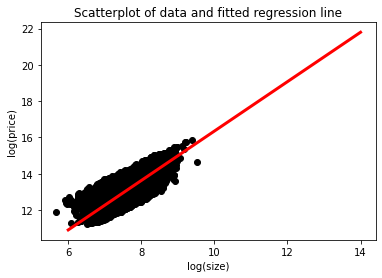

In [ ]:
import matplotlib.pyplot as plt

# Initialize an Adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

# Multiple linear regression
In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

You will use price_log as your target and size_log and bedrooms as your features. Each of these tensors has been defined and is available. You will also switch from using the the mean squared error loss to the mean absolute error loss: keras.losses.mae(). Finally, the predicted values are computed as follows: params[0] + feature1*params[1] + feature2*params[2]. Note that we've defined a vector of parameters, params, as a variable, rather than using three variables. Here, params[0] is the intercept and params[1] and params[2] are the slopes.

In [ ]:
bedrooms= np.array(housing.bedrooms, np.float32)
params= Variable([0.1, 0.5, 0.02])
def print_results(params):
	return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'.format(loss_function(params).numpy(), params[0].numpy(), params[1].numpy(), params[2].numpy()))

In [ ]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 9.093, intercept: 0.101, slope_1: 0.501, slope_2: 0.021
loss: 9.081, intercept: 0.102, slope_1: 0.502, slope_2: 0.022
loss: 9.069, intercept: 0.103, slope_1: 0.503, slope_2: 0.023
loss: 9.058, intercept: 0.104, slope_1: 0.504, slope_2: 0.024
loss: 9.046, intercept: 0.105, slope_1: 0.505, slope_2: 0.025
loss: 9.034, intercept: 0.106, slope_1: 0.506, slope_2: 0.026
loss: 9.022, intercept: 0.107, slope_1: 0.507, slope_2: 0.027
loss: 9.010, intercept: 0.108, slope_1: 0.508, slope_2: 0.028
loss: 8.998, intercept: 0.109, slope_1: 0.509, slope_2: 0.029
loss: 8.986, intercept: 0.110, slope_1: 0.510, slope_2: 0.030


# Preparing to batch train
Before we can train a linear model in batches, we must first define variables, a loss function, and an optimization operation. In this exercise, we will prepare to train a model that will predict price_batch, a batch of house prices, using size_batch, a batch of lot sizes in square feet. In contrast to the previous lesson, we will do this by loading batches of data using pandas, converting it to numpy arrays, and then using it to minimize the loss function in steps.

Variable(), keras(), and float32 have been imported for you. Note that you should not set default argument values for either the model or loss function, since we will generate the data in batches during the training process.

In [ ]:
# Define the intercept and slope
intercept = Variable(10.0, float32)
slope = Variable(0.5, float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + features*slope

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

# Training a linear model in batches
In this exercise, we will train a linear regression model in batches, starting where we left off in the previous exercise. We will do this by stepping through the dataset in batches and updating the model's variables, intercept and slope, after each step. This approach will allow us to train with datasets that are otherwise too large to hold in memory.

Note that the loss function,loss_function(intercept, slope, targets, features), has been defined for you. Additionally, keras has been imported for you and numpy is available as np. The trainable variables should be entered into var_list in the order in which they appear as loss function arguments.

In [ ]:
# Initialize Adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016001


# The linear algebra of dense layers
There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.

This image depicts an neural network with 5 input nodes and 3 output nodes.
The input layer contains 3 features -- education, marital status, and age -- which are available as borrower_features. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. Note that Variable(), ones(), matmul(), and keras() have been imported from tensorflow.

In [1]:
import numpy as np
import pandas as pd

borrower_features= np.array([[2,2,43]], dtype=np.float32)
borrower_features

array([[ 2.,  2., 43.]], dtype=float32)

In [2]:
from tensorflow import ones, Variable, matmul, keras
# Initialize bias1
bias1 = Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = Variable(ones((3, 2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = matmul(borrower_features, weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 dense1's output shape: (1, 2)

 prediction: 0.9525741338729858

 actual: 1


# The low-level approach with multiple examples
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, weights1, and bias, bias1, are available. We'll then perform matrix multiplication of the borrower_features tensor by the weights1 variable. Recall that the borrower_features tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of products1 + bias1, yielding dense1.

 
 

Note that matmul() and keras() have been imported from tensorflow.

In [3]:
# Compute the product of borrower_features and weights1
products1 = matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (1, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  ()

 shape of dense1:  (1, 2)


# Using the dense layer operation
We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.

This image depicts an neural network with 10 inputs nodes and 1 output node.

To construct this network, we'll need to define three dense layers, each of which takes the previous layer as an input, multiplies it by weights, and applies an activation function. Note that input data has been defined and is available as a 100x10 tensor: borrower_features. Additionally, the keras.layers module is available.

In [6]:
import tensorflow as tf
from tensorflow import float32, cast
borrower_features

<tf.Tensor: shape=(100, 10), dtype=float32, numpy=
array([[6.96469188e-01, 2.86139339e-01, 2.26851448e-01, 5.51314771e-01,
        7.19468951e-01, 4.23106462e-01, 9.80764210e-01, 6.84829712e-01,
        4.80931908e-01, 3.92117530e-01],
       [3.43178004e-01, 7.29049683e-01, 4.38572258e-01, 5.96778952e-02,
        3.98044258e-01, 7.37995386e-01, 1.82491735e-01, 1.75451756e-01,
        5.31551361e-01, 5.31827569e-01],
       [6.34400964e-01, 8.49431813e-01, 7.24455297e-01, 6.11023486e-01,
        7.22443402e-01, 3.22958916e-01, 3.61788660e-01, 2.28263229e-01,
        2.93714046e-01, 6.30976140e-01],
       [9.21049416e-02, 4.33701187e-01, 4.30862755e-01, 4.93685097e-01,
        4.25830305e-01, 3.12261224e-01, 4.26351309e-01, 8.93389165e-01,
        9.44160044e-01, 5.01836658e-01],
       [6.23952925e-01, 1.15618393e-01, 3.17285478e-01, 4.14826214e-01,
        8.66309166e-01, 2.50455379e-01, 4.83034253e-01, 9.85559762e-01,
        5.19485116e-01, 6.12894535e-01],
       [1.20628662e-01, 

In [7]:
# define the first layer
dense1= keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# define the dense layer with 3 output nodes
dense2= keras.layers.Dense(3, activation='sigmoid')(dense1)

# define dense layer with 1 output node
predictions= keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


# Binary classification problems
In this exercise, you will again make use of credit card data. The target variable, default, indicates whether a credit card holder defaults on his or her payment in the following period. Since there are only two options--default or not--this is a binary classification problem. While the dataset has many features, you will focus on just three: the size of the three latest credit card bills. Finally, you will compute predictions from your untrained network, outputs, and compare those the target variable, default.

The tensor of features has been loaded and is available as bill_amounts. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

In [49]:
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
df= pd.read_csv('uci_credit_card.csv')
df.head()
bill_amounts= df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].to_numpy()
default= df['default.payment.next.month'].to_numpy()
bill_amounts

array([[ 3913.,  3102.,   689.],
       [ 2682.,  1725.,  2682.],
       [29239., 14027., 13559.],
       ...,
       [ 3565.,  3356.,  2758.],
       [-1645., 78379., 76304.],
       [47929., 48905., 49764.]])

In [18]:
from tensorflow import constant
# Construct input layres from features
inputs= constant(bill_amounts, float32)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[ 0.5  0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5 -0.5]]


# Multiclass classification problems
In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes. The tensor of features has been loaded and is available as borrower_features. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

In [20]:
# Construct input layer from borrower features
inputs = constant(borrower_features, float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.15945822 0.14593859 0.16867043 0.19449317 0.19906294 0.13237664]
 [0.16009365 0.14027879 0.17783315 0.19295382 0.20548496 0.12335552]
 [0.15991412 0.14132328 0.18050177 0.18967205 0.20391218 0.12467656]
 [0.15889274 0.14471792 0.16495816 0.19933465 0.201253   0.13084355]
 [0.1657837  0.14600182 0.17094366 0.18973123 0.19494691 0.1325927 ]]


# The dangers of local minima
Consider the plot of the following loss function, loss_function(), which contains a global minimum, marked by the dot on the right, and several local minima, including the one marked by the dot on the left.

The graph is of a single variable function that contains multiple local minima and a global minimum.

In this exercise, you will try to find the global minimum of loss_function() using keras.optimizers.SGD(). You will do this twice, each time with a different initial value of the input to loss_function(). First, you will use x_1, which is a variable with an initial value of 6.0. Second, you will use x_2, which is a variable with an initial value of 0.3. Note that loss_function() has been defined and is available.

In [27]:
from tensorflow import divide
from math import pi
def loss_function(x): 
  return 4.0*math.cos(x-1)+divide(math.cos(2.0*pi*x),x)

# Initialize x_1 and x_2
x_1 = Variable(6.0,float32)
x_2 = Variable(0.3,float32)

# Define the optimization operation
opt = keras.optimizers.SGD(learning_rate=.01)

for j in range(100):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

4.3801394 0.42052683


# Avoiding local minima
The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem, which has been defined and is available for you as loss_function().


The graph is of a single variable function that contains multiple local minima and a global minimum.

Several optimizers in tensorflow have a momentum parameter, including SGD and RMSprop. You will make use of RMSprop in this exercise. Note that x_1 and x_2 have been initialized to the same value this time. Furthermore, keras.optimizers.RMSprop() has also been imported for you from tensorflow.

In [28]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,float32)
x_2 = Variable(0.05,float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=.01, momentum=.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

4.315026 0.4205261


# Initialization in TensorFlow
A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23. Several operations have been imported from tensorflow: Variable(), random(), and ones().

In [62]:
from tensorflow import Variable, random, ones
# Define layer 1 weights
w1= Variable(random.normal([23,7]), float32)
print('\n w1:', w1[0:3])

# Initialize the layer 1 bias
b1= Variable(ones([7]), float32)
print('\n b1:', b1)

# Define the layer 2 weights
w2 = Variable(random.normal([7,1]), float32)
print('\n w2:', w2)

# Define the layer 2 bias
b2 = Variable(ones([0]), float32)
print('\n b2:', b2)


 w1: tf.Tensor(
[[-0.70357114  0.10741152 -0.99401665  0.56926185 -1.3144608   0.6989371
   1.0502824 ]
 [-0.61763674 -0.29760334  0.29577795  0.41939247 -0.42299017 -0.03174335
   1.3151972 ]
 [-0.2655664   0.18825804 -1.1340133  -0.38481694 -0.41872802  0.76578933
   0.7452691 ]], shape=(3, 7), dtype=float32)

 b1: <tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

 w2: <tf.Variable 'Variable:0' shape=(7, 1) dtype=float32, numpy=
array([[ 0.5432494],
       [-0.4596732],
       [-0.3667241],
       [-1.3653041],
       [-2.0151103],
       [ 0.5871636],
       [-1.7849593]], dtype=float32)>

 b2: <tf.Variable 'Variable:0' shape=(0,) dtype=float32, numpy=array([], dtype=float32)>


# Defining the model and loss function
In this exercise, you will train a neural network to predict whether a credit card holder will default. The features and targets you will use to train your network are available in the Python shell as borrower_features and default. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as , where  is the sigmoid activation, layer1 is a tensor of nodes for the first hidden dense layer, w2 is a tensor of weights, and b2 is the bias tensor.

The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

In [67]:
borrower_features= np.array(df.drop(['ID', 'default.payment.next.month'], axis=1), np.float32)
default= np.array(df['default.payment.next.month'], np.float32)
borrower_features

array([[2.0000e+04, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2000e+05, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [9.0000e+04, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [3.0000e+04, 1.0000e+00, 2.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [8.0000e+04, 1.0000e+00, 3.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [5.0000e+04, 1.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]], dtype=float32)

In [68]:
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout rate of 0.25
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

# Training neural networks with TensorFlow
In the previous exercise, you defined a model, model(w1, b1, w2, b2, features), and a loss function, loss_function(w1, b1, w2, b2, features, targets), both of which are available to you in this exercise. You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of test_features and test_targets and is available to you. The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

In [72]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets= train_test_split(borrower_features, default, test_size=0.2)

In [ ]:
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model using test features
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

In [77]:
# define input data
inputs= np.array(borrower_features, np.float32)

# define Dense layer 1
dense1= tf.keras.layers.Dense(32, activation='relu')(inputs)

# define Dense 2
dense2= tf.keras.layers.Dense(16, activation='relu')(dense1)

#apply dropout 
dropout1= tf.keras.layers.Dropout(0.25)(dense2)

#Define output layers
outputs= tf.keras.layers.Dense(1, activation='sigmoid')(dropout1)

# The sequential model in Keras
In chapter 3, we used components of the keras API in tensorflow to define a neural network, but we stopped short of using its full capabilities to streamline model definition and training. In this exercise, you will use the keras sequential model API to define a neural network that can be used to classify images of sign language letters. You will also use the .summary() method to print the model's architecture, including the shape and number of parameters associated with each layer.

Note that the images were reshaped from (28, 28) to (784,), so that they could be used as inputs to a dense layer. Additionally, note that keras has been imported from tensorflow for you.

In [79]:
# Define a Keras sequential model 
model= keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))

# define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# print the model architecture
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                12560     
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 4)                 36        
                                                                 
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


# The sequential model in Keras
In chapter 3, we used components of the keras API in tensorflow to define a neural network, but we stopped short of using its full capabilities to streamline model definition and training. In this exercise, you will use the keras sequential model API to define a neural network that can be used to classify images of sign language letters. You will also use the .summary() method to print the model's architecture, including the shape and number of parameters associated with each layer.

Note that the images were reshaped from (28, 28) to (784,), so that they could be used as inputs to a dense layer. Additionally, note that keras has been imported from tensorflow for you.

In [80]:
# Define the first dense layer
model.add(keras.layers.Dense(16,activation='sigmoid', input_shape=(784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                12560     
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 4)                 36        
                                                                 
 dense_21 (Dense)            (None, 16)                80        
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 4)                 68        
                                                                 
Total params: 12,880
Trainable params: 12,880
Non-trai

# Defining a multiple input model
In some cases, the sequential API will not be sufficiently flexible to accommodate your desired model architecture and you will need to use the functional API instead. If, for instance, you want to train two models with different architectures jointly, you will need to use the functional API to do this. In this exercise, we will see how to do this. We will also use the .summary() method to examine the joint model's architecture.

Note that keras has been imported from tensorflow for you. Additionally, the input layers of the first and second models have been defined as m1_inputs and m2_inputs, respectively. Note that the two models have the same architecture, but one of them uses a sigmoid activation in the first layer and the other uses a relu.

In [81]:
#Define model 1 input layer shape
m1_inputs= tf.keras.Input(shape=(784,))

# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

#define model 2 input layer shape
m2_inputs= tf.keras.Input(shape=(784,))

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_23 (Dense)               (None, 12)           9420        ['input_1[0][0]']                
                                                                                                  
 dense_25 (Dense)               (None, 12)           9420        ['input_2[0][0]']                
                                                                                              

# Training with Keras
In this exercise, we return to our sign language letter classification problem. We have 2000 images of four letters--A, B, C, and D--and we want to classify them with a high level of accuracy. We will complete all parts of the problem, including the model definition, compilation, and training.

Note that keras has been imported from tensorflow for you. Additionally, the features are available as sign_language_features and the targets are available as sign_language_labels.

In [109]:
sign= pd.read_csv('slmnist.csv')
sign= sign.loc[0:999]
sign

,1,142,143,146,148,149,149.1,149.2,150,151,...,0.1,15,55,63,37.2,61.1,77.2,65.1,38.1,23
0,0,141,142,144,145,147,149,150,151,152,...,173,179,179,180,181,181,182,182,183,183
1,1,156,157,160,162,164,166,169,171,171,...,181,197,195,193,193,191,192,198,193,182
2,3,63,26,65,86,97,106,117,123,128,...,175,179,180,182,183,183,184,185,185,185
3,1,156,160,164,168,172,175,178,180,182,...,108,107,106,110,111,108,108,102,84,70
4,0,159,163,167,168,170,173,175,178,178,...,173,233,235,235,236,235,235,236,235,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,156,159,164,168,172,175,177,179,180,...,108,107,106,110,111,108,108,102,85,71
996,2,207,207,207,208,209,209,209,209,209,...,252,251,250,249,250,248,247,247,244,241
997,1,110,115,120,123,125,129,132,133,134,...,115,190,176,177,175,174,171,169,168,164
998,3,108,118,128,134,137,142,147,151,154,...,104,104,104,102,100,151,221,203,194,212


In [116]:
X = sign.iloc[:, 1:]
y = sign.iloc[:, 0]
sign_language_features = (X -  X.mean()) / (X.max() - X.min()).to_numpy()
sign_language_labels = pd.get_dummies(y).astype(np.float32).to_numpy()

In [120]:
# Define a sequential model
model= keras.Sequential()

# Define a hidden layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Compile the model
model.compile('SGD', loss='categorical_crossentropy')

# Complete the fitting operation
model.fit(sign_language_features, sign_language_labels, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 1.3454
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 1.1906
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 1.0691
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.9658
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.8751


# Metrics and validation with Keras
We trained a model to predict sign language letters in the previous exercise, but it is unclear how successful we were in doing so. In this exercise, we will try to improve upon the interpretability of our results. Since we did not use a validation split, we only observed performance improvements within the training set; however, it is unclear how much of that was due to overfitting. Furthermore, since we did not supply a metric, we only saw decreases in the loss function, which do not have any clear interpretation.

Note that keras has been imported for you from tensorflow.

In [122]:
# Define model 
model= keras.Sequential()

# Define first layer
model.add(keras.layers.Dense(32, activation='sigmoid', input_shape=(784,)))

# define output layers
model.add(keras.layers.Dense(4, activation='softmax'))

# set the optimizer, loss function and metrics 
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(sign_language_features, sign_language_labels, epochs=10, validation_split=.10)

Epoch 1/10
29/29 [==============================] - 1s 13ms/step - loss: 1.0452 - accuracy: 0.5744 - val_loss: 0.7522 - val_accuracy: 0.8200
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.9156 - val_loss: 0.5300 - val_accuracy: 0.9300
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.9711 - val_loss: 0.3915 - val_accuracy: 0.9700
Epoch 4/10
29/29 [==============================] - 0s 5ms/step - loss: 0.3257 - accuracy: 0.9844 - val_loss: 0.2833 - val_accuracy: 0.9900
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9911 - val_loss: 0.2095 - val_accuracy: 0.9900
Epoch 6/10
29/29 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.9944 - val_loss: 0.1582 - val_accuracy: 0.9900
Epoch 7/10
29/29 [==============================] - 0s 7ms/step - loss: 0.1287 - accuracy: 0.9956 - val_loss: 0.1117 - val_accuracy: 0.9900
Epoch 8/10
29/29 [=

# Overfitting detection
In this exercise, we'll work with a small subset of the examples from the original sign language letters dataset. A small sample, coupled with a heavily-parameterized model, will generally lead to overfitting. This means that your model will simply memorize the class of each example, rather than identifying features that generalize to many examples.

You will detect overfitting by checking whether the validation sample loss is substantially higher than the training sample loss and whether it increases with further training. With a small sample and a high learning rate, the model will struggle to converge on an optimum. You will set a low learning rate for the optimizer, which will make it easier to identify overfitting.

Note that keras has been imported from tensorflow.

In [125]:
# Define sequential model
# Define sequential model
model= keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(1024, activation='relu', input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(4, activation='softmax'))

# Finish the model compilation
model.compile(optimizer=keras.optimizers.Adam(lr=.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the model fit operation
model.fit(sign_language_features, sign_language_labels, epochs=5, validation_split=0.5)

# val loss much greating then loss you get overfitting 
# val_loss started to increase before the training process was terminated, then we may have overfitted. 
# When this happens, you will want to try decreasing the number of epochs.

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 2s 56ms/step - loss: 0.4594 - accuracy: 0.8740 - val_loss: 0.1387 - val_accuracy: 0.9660
Epoch 2/5
16/16 [==============================] - 0s 29ms/step - loss: 0.0600 - accuracy: 0.9860 - val_loss: 0.0523 - val_accuracy: 0.9860
Epoch 3/5
16/16 [==============================] - 0s 29ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9880
Epoch 4/5
16/16 [==============================] - 0s 28ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9880
Epoch 5/5
16/16 [==============================] - 0s 27ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9880


# Evaluating models
Two models have been trained and are available: large_model, which has many parameters; and small_model, which has fewer parameters. Both models have been trained using train_features and train_labels, which are available to you. A separate test set, which consists of test_features and test_labels, is also available.

Your goal is to evaluate relative model performance and also determine whether either model exhibits signs of overfitting. You will do this by evaluating large_model and small_model on both the train and test sets. For each model, you can do this by applying the .evaluate(x, y) method to compute the loss for features x and labels y. You will then compare the four losses generated.

In [127]:
train_features, test_features, train_labels, test_labels= train_test_split(sign_language_features, sign_language_labels, test_size=0.2)
# Evaluate the small model using the train data
small_train = model.evaluate(train_features, train_labels)

# Evaluate the small model using the test data
small_test = model.evaluate(test_features, test_labels)

# Print losses
print('\n Small - Train: {}, Test: {}'.format(small_train, small_test))


7/7 [==============================] - 0s 16ms/step - loss: 0.0134 - accuracy: 0.9950

 Small - Train: [0.012176238000392914, 0.9937499761581421], Test: [0.01335420086979866, 0.9950000047683716]


# Preparing to train with Estimators
For this exercise, we'll return to the King County housing transaction dataset from chapter 2. We will again develop and train a machine learning model to predict house prices; however, this time, we'll do it using the estimator API.

Rather than completing everything in one step, we'll break this procedure down into parts. We'll begin by defining the feature columns and loading the data. In the next exercise, we'll define and train a premade estimator. Note that feature_column has been imported for you from tensorflow. Additionally, numpy has been imported as np, and the Kings County housing dataset is available as a pandas DataFrame: housing.

In [131]:
housing= pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [133]:
from tensorflow import feature_column

# Define feature columns for bedrooms and bathrooms
bedrooms = feature_column.numeric_column("bedrooms")
bathrooms = feature_column.numeric_column("bathrooms")

# Define the list of feature columns
feature_list = [bedrooms, bathrooms]

def input_fn():
	# Define the labels
	labels = np.array(housing['price'])
	# Define the features
	features = {'bedrooms':np.array(housing['bedrooms']), 
                'bathrooms':np.array(housing['bathrooms'])}
	return features, labels

# Defining Estimators
In the previous exercise, you defined a list of feature columns, feature_list, and a data input function, input_fn(). In this exercise, you will build on that work by defining an estimator that makes use of input data.

In [137]:
from tensorflow import estimator
# Define the model and set the number of steps
model= estimator.DNNRegressor(feature_columns=feature_list, hidden_units=[2,2])
model.train(input_fn, steps=1)


In [138]:
# Define the model and set the number of steps
model = estimator.LinearRegressor(feature_columns=feature_list)
model.train(input_fn, steps=2)
